In [76]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os
from db_config import get_redis_connection
import matplotlib.pyplot as plt
import json

In [72]:
%load_ext autoreload
%autoreload 2

In [178]:
redis_conn.delete("city:northampton")

1

In [77]:
# connect to redis
redis_conn = get_redis_connection()

In [ ]:
# hist weather api and explore data
# https://app.tomorrow.io/home
# https://docs.tomorrow.io/reference/welcome?ref=apilist.fun
# curl --request GET --url 'https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv'
URL = 'https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv'

r = requests.get(URL)
r.status_code

In [173]:
redis_conn.hset("city:northampton", "data", json.dumps(r.json()))

1

In [180]:
r = requests.get('http://127.0.0.1:8000//weatherforecast/{us_city}'.format(us_city="northampton"))
print(r.status_code)

200


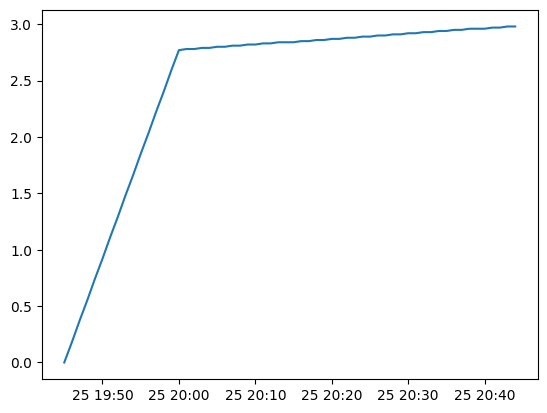

In [185]:


data = pd.json_normalize(r.json()['data']['timelines']['minutely'])
data['time'] = pd.to_datetime(data['time'])
plt.plot(data.time, data['values.windSpeed'])
plt.show()

60


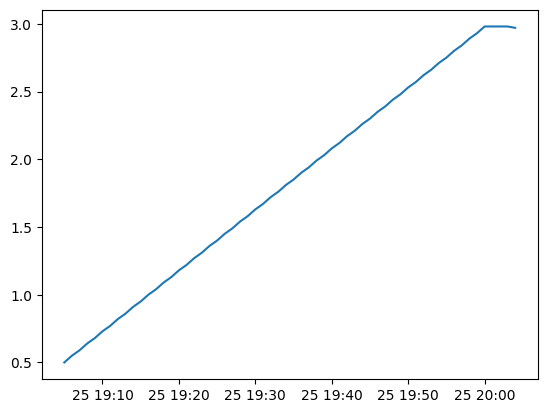

In [179]:
us_city = "northampton"
city_key = f"city:{us_city}"
city_data = redis_conn.hgetall(city_key)
data = json.loads(city_data["data"])

data = pd.json_normalize(r.json()['timelines']['minutely'])
print(len(data))

data['time'] = pd.to_datetime(data['time'])
plt.plot(data.time, data['values.windSpeed'])
plt.show()

In [25]:
# get lat and long coordinates of us cities
# https://www.latlong.net/category/cities-236-15.html
city_coordinates = pd.read_csv('data/us_cities.txt', delimiter='\t', names=['city_state_country', 'longitude', 'latitude'])

# split city_state_country into separate city, state and country columns
splits = city_coordinates.city_state_country.str.split(',')
city_coordinates['city'] = splits.apply(lambda x: x[0])
city_coordinates['state'] = splits.apply(lambda x: x[1])
city_coordinates['country'] = splits.apply(lambda x: x[2])

# drop city_state_country
city_coordinates.drop('city_state_country', axis=1, inplace=True)

# write back as clean csv
city_coordinates.to_csv('data/us_cities_clean.csv')
city_coordinates.head()

,longitude,latitude,city,state,country
0,42.536457,-70.985786,Peabody,MA,USA
1,42.328674,-72.664658,Northampton,MA,USA
2,42.341042,-71.217133,Newton,MA,USA
3,42.810356,-70.893875,Newburyport,MA,USA
4,41.638409,-70.941208,New Bedford,MA,USA


200

In [5]:
r.json()['location']

{'lat': 42.3478, 'lon': -71.0466}

In [101]:
r.json()['timelines']['daily']

[{'time': '2024-02-25T11:00:00Z',
  'values': {'cloudBaseAvg': 1.09,
   'cloudBaseMax': 6.42,
   'cloudBaseMin': 0,
   'cloudCeilingAvg': 1.75,
   'cloudCeilingMax': 9.7,
   'cloudCeilingMin': 0,
   'cloudCoverAvg': 31.68,
   'cloudCoverMax': 100,
   'cloudCoverMin': 0,
   'dewPointAvg': -12.01,
   'dewPointMax': -5.03,
   'dewPointMin': -18.81,
   'evapotranspirationAvg': 0.083,
   'evapotranspirationMax': 0.229,
   'evapotranspirationMin': 0.022,
   'evapotranspirationSum': 1.905,
   'freezingRainIntensityAvg': 0,
   'freezingRainIntensityMax': 0,
   'freezingRainIntensityMin': 0,
   'humidityAvg': 49.76,
   'humidityMax': 73.3,
   'humidityMin': 24.82,
   'iceAccumulationAvg': 0,
   'iceAccumulationLweAvg': 0,
   'iceAccumulationLweMax': 0,
   'iceAccumulationLweMin': 0,
   'iceAccumulationLweSum': 0,
   'iceAccumulationMax': 0,
   'iceAccumulationMin': 0,
   'iceAccumulationSum': 0,
   'moonriseTime': '2024-02-25T23:43:50Z',
   'moonsetTime': '2024-02-25T12:12:20Z',
   'precipitati

60


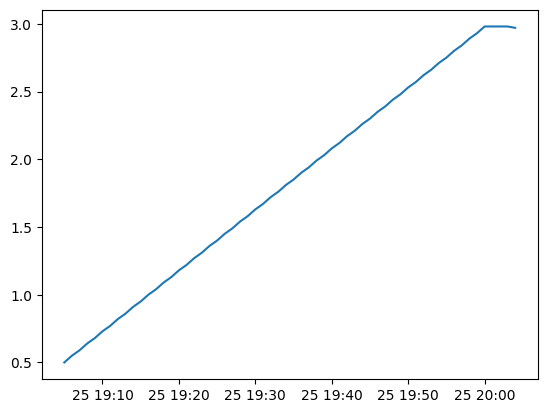

,time,values.cloudBase,values.cloudCeiling,values.cloudCover,values.dewPoint,values.freezingRainIntensity,values.humidity,values.precipitationProbability,values.pressureSurfaceLevel,values.rainIntensity,...,values.snowIntensity,values.temperature,values.temperatureApparent,values.uvHealthConcern,values.uvIndex,values.visibility,values.weatherCode,values.windDirection,values.windGust,values.windSpeed
0,2024-02-25 19:05:00+00:00,None,None,1.00,-15.69,0,29.00,0,1017.31,0,...,0,2.00,2.00,0,1,16,1000,180.31,4.13,0.50
1,2024-02-25 19:06:00+00:00,None,None,0.98,-15.69,0,28.92,0,1017.28,0,...,0,2.02,2.02,0,1,16,1000,180.31,4.12,0.55
2,2024-02-25 19:07:00+00:00,None,None,0.96,-15.69,0,28.85,0,1017.24,0,...,0,2.04,2.04,0,1,16,1000,180.31,4.12,0.59
3,2024-02-25 19:08:00+00:00,None,None,0.95,-15.70,0,28.77,0,1017.21,0,...,0,2.06,2.06,0,1,16,1000,180.31,4.11,0.64
4,2024-02-25 19:09:00+00:00,None,None,0.93,-15.70,0,28.70,0,1017.18,0,...,0,2.09,2.09,0,1,16,1000,180.31,4.11,0.68


In [108]:
data = pd.json_normalize(r.json()['timelines']['minutely'])
print(len(data))

data['time'] = pd.to_datetime(data['time'])
plt.plot(data.time, data['values.windSpeed'])
plt.show()
data.head()

In [118]:
str(r.json())

"{'timelines': {'minutely': [{'time': '2024-02-25T19:05:00Z', 'values': {'cloudBase': None, 'cloudCeiling': None, 'cloudCover': 1, 'dewPoint': -15.69, 'freezingRainIntensity': 0, 'humidity': 29, 'precipitationProbability': 0, 'pressureSurfaceLevel': 1017.31, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 2, 'temperatureApparent': 2, 'uvHealthConcern': 0, 'uvIndex': 1, 'visibility': 16, 'weatherCode': 1000, 'windDirection': 180.31, 'windGust': 4.13, 'windSpeed': 0.5}}, {'time': '2024-02-25T19:06:00Z', 'values': {'cloudBase': None, 'cloudCeiling': None, 'cloudCover': 0.98, 'dewPoint': -15.69, 'freezingRainIntensity': 0, 'humidity': 28.92, 'precipitationProbability': 0, 'pressureSurfaceLevel': 1017.28, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 2.02, 'temperatureApparent': 2.02, 'uvHealthConcern': 0, 'uvIndex': 1, 'visibility': 16, 'weatherCode': 1000, 'windDirection': 180.31, 'windGust': 4.12, 'windSpeed': 0.55}}, {'time': '20

In [87]:
# choose city
city_key = 'Northampton'

# get lat and long coordinates
location = city_coordinates.loc[
    city_coordinates.city.str.lower() == city_key.lower(), 
    ['longitude', 'latitude']
].to_numpy().flatten().tolist()

print(location)

[42.328674, -72.664658]


In [44]:
URL = 'https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv'
print(URL)

r = requests.get(URL)
r.status_code

https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv


200

In [89]:
lat, long = location
lat

42.328674

In [93]:
load_dotenv()
WEATHER_API_KEY = os.environ.get("WEATHER_API_KEY")

URL = 'https://api.tomorrow.io/v4/weather/forecast?location={lat},{long}&apikey={WEATHER_API_KEY}'.format(lat=lat, long=long, WEATHER_API_KEY=WEATHER_API_KEY)

lat, long = [42.3478,-71.0466]
# lat, long = location
print('https://api.tomorrow.io/v4/weather/forecast?location={lat},{long}&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv'.format(lat=42.3478, long=-71.0466))
print(URL)

r = requests.get(URL)
print(r.status_code)

https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv
https://api.tomorrow.io/v4/weather/forecast?location=42.3478,-71.0466&apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv
200


In [56]:
baseURL = "https://api.tomorrow.io/v4/weather/forecast"
body = {"location": location} 
response = requests.post(f'{baseURL}?apikey={WEATHER_API_KEY}', json=body)
data = response.json()
data

{'message': 'no Route matched with those values'}

In [37]:

import datetime as dt
import pytz
import requests
import matplotlib.pyplot as plt
import pandas as pd

# set the Historical API POST endpoint as the target URL
postHistoricalURL = "https://api.tomorrow.io/v4/weather/forecast"

# get your key from app.tomorrow.io/development/keys
apikey = WEATHER_API_KEY

# pick the location, as a latlong pair
location = [42.63496561409271, -73.68988401705542]
# location = [42.328674, -72.66465]

# # list the fields
# fields = [
#     "totalPrecipitationAccumulationMax",
#     "windSpeedMax",
# 		"windDirectionAvg",
# 		"windGustMax",
#     "snowAccumulationMax"
# ]
# # choose the unit system, either metric or imperial
# units = "imperial"

# # set the timesteps, like "current", "1h" and "1d"
# timesteps = ["1d"]

# # configure the time frame within the historical bounderies (January 1st, 2015 till 7 days in the past)
# now = dt.datetime.now(pytz.UTC)
# startTime = '2020-12-01T12:00:00.000Z' #(now + dt.timedelta(days=-430)).isoformat()
# endTime = '2020-12-20T12:00:00.000Z' #(now + dt.timedelta(days=-422)).isoformat()

# # specify the timezone, using standard IANA timezone format
# timezone = "US/Eastern"

# request the historical timelines with all the body parameters as options
body = {"location": location} #, "fields": fields, "units": units, "timesteps": timesteps, "startTime": startTime, "endTime": endTime, "timezone":timezone}
response = requests.post(f'{postHistoricalURL}?apikey={apikey}', json=body)
data = response.json()
data
# data = data["data"]["timelines"]

# # create a dataframe with the response values
# df = pd.DataFrame()
# for item in data:
#     item = item["intervals"]
#     df = pd.json_normalize(item)
# df.rename(columns={'startTime': 'Date'}, inplace=True)
# df.Date = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# # bring your own data - we use mock data for the example
# delays = [32, 20, 12, 16, 12, 12, 13, 23, 2, 3, 8, 5, 14, 30, 90, 100, 50, 30, 20, 11]
# delayAvgDurationMin = [48, 40, 15, 16, 14, 10, 13, 4, 3, 7, 3, 8, 40, 190, 220, 110, 40, 50, 18, 90]
# missedDeliveries = [10, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 15, 90, 100, 50, 30, 20, 45]
# routeAvgLength = [132, 240, 112, 36, 62, 32, 43, 37, 20, 19, 82, 67, 97, 112, 90, 57, 22, 49, 63, 143]
# df['Delays'] = delays
# df['Delay Avg Duration Min'] = delayAvgDurationMin
# df['Missed Deliveries'] = missedDeliveries
# df['Route Average Length'] = routeAvgLength

# # visualize:
# df.plot(x="Date", y=["Delays"])
# df.plot(x="Date", y=["values.snowAccumulationMax"])
# plt.show()
# print('done')

{'message': 'no Route matched with those values'}

In [36]:
f'{postHistoricalURL}?apikey={apikey}'

'https://api.tomorrow.io/v4/weather/forecast?apikey=Spkfris4dB0T2vgoA63St81ITDEfLubv'